In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [26]:
df = pd.read_csv('./Global_Cybersecurity_Threats_2015-2024.csv')

In [27]:
df.head()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


In [28]:
df.shape

(3000, 10)

In [29]:

df.dtypes


Country                                 object
Year                                     int64
Attack Type                             object
Target Industry                         object
Financial Loss (in Million $)          float64
Number of Affected Users                 int64
Attack Source                           object
Security Vulnerability Type             object
Defense Mechanism Used                  object
Incident Resolution Time (in Hours)      int64
dtype: object

In [30]:
df.isnull().sum()

Country                                0
Year                                   0
Attack Type                            0
Target Industry                        0
Financial Loss (in Million $)          0
Number of Affected Users               0
Attack Source                          0
Security Vulnerability Type            0
Defense Mechanism Used                 0
Incident Resolution Time (in Hours)    0
dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.5+ KB


In [32]:
df['Country'].unique()

array(['China', 'India', 'UK', 'Germany', 'France', 'Australia', 'Russia',
       'Brazil', 'Japan', 'USA'], dtype=object)

In [33]:
df['Attack Type'].unique()

array(['Phishing', 'Ransomware', 'Man-in-the-Middle', 'DDoS',
       'SQL Injection', 'Malware'], dtype=object)

In [34]:
print("\n\n2. UNIQUE VALUES IN OBJECT COLUMNS")
print("=" * 60)

for col in df.columns:
    unique_vals = df[col].unique()
    print(f"\nColumn: {col}")
    print(f"Unique Values ({len(unique_vals)}):")
    print(unique_vals)




2. UNIQUE VALUES IN OBJECT COLUMNS

Column: Country
Unique Values (10):
['China' 'India' 'UK' 'Germany' 'France' 'Australia' 'Russia' 'Brazil'
 'Japan' 'USA']

Column: Year
Unique Values (10):
[2019 2017 2024 2018 2016 2023 2022 2015 2021 2020]

Column: Attack Type
Unique Values (6):
['Phishing' 'Ransomware' 'Man-in-the-Middle' 'DDoS' 'SQL Injection'
 'Malware']

Column: Target Industry
Unique Values (7):
['Education' 'Retail' 'IT' 'Telecommunications' 'Government' 'Banking'
 'Healthcare']

Column: Financial Loss (in Million $)
Unique Values (2536):
[80.53 62.19 38.65 ... 32.97 32.17 48.2 ]

Column: Number of Affected Users
Unique Values (2998):
[773169 295961 605895 ... 734737 379954 480984]

Column: Attack Source
Unique Values (4):
['Hacker Group' 'Nation-state' 'Insider' 'Unknown']

Column: Security Vulnerability Type
Unique Values (4):
['Unpatched Software' 'Weak Passwords' 'Social Engineering' 'Zero-day']

Column: Defense Mechanism Used
Unique Values (5):
['VPN' 'Firewall' 'AI-b

In [35]:
# Count attack types
attack_counts = df['Attack Type'].value_counts()

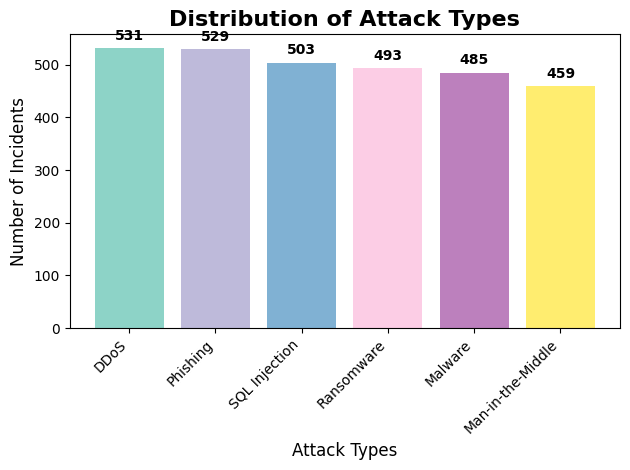

In [36]:
# Plot
colors = plt.cm.Set3(np.linspace(0, 1, len(attack_counts)))
bars = plt.bar(attack_counts.index, attack_counts.values, color=colors)

# Titles and labels
plt.title('Distribution of Attack Types', fontsize=16, fontweight='bold')
plt.xlabel('Attack Types', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add value labels
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02*max(attack_counts.values),
             f"{int(bar.get_height())}", ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

In [37]:
df_processed = df.copy()

In [38]:
numerical_cols = [
    'Financial_Loss_in_Million_USD',
    'Number_of_Affected_Users',
    'Incident_Resolution_Time_in_Hours'
]

In [39]:
for col in numerical_cols:
    if col in df_processed.columns:
        negative_count = (df_processed[col] < 0).sum()
        if negative_count > 0:
            print(f"⚠ Found {negative_count} negative values in {col}")
            df_processed[col] = df_processed[col].clip(lower=0)

## Feature engineering

In [40]:
df_processed.head(10)

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68
5,Germany,2017,Man-in-the-Middle,Retail,98.24,285201,Unknown,Social Engineering,Antivirus,25
6,Germany,2016,DDoS,Telecommunications,33.26,431262,Insider,Unpatched Software,VPN,34
7,France,2018,SQL Injection,Government,59.23,909991,Unknown,Social Engineering,Antivirus,66
8,India,2016,Man-in-the-Middle,Banking,16.88,698249,Unknown,Social Engineering,VPN,47
9,UK,2023,DDoS,Healthcare,69.14,685927,Hacker Group,Unpatched Software,Firewall,58


In [41]:
df_processed['Year_normalized'] = (
    (df_processed['Year'] - df_processed['Year'].min()) / 
    (df_processed['Year'].max() - df_processed['Year'].min())
)

df_processed['Years_since_2015'] = df_processed['Year'] - 2015

In [42]:
# --- Financial impact categories ---
df_processed['Financial_Impact_Category'] = pd.cut(
    df_processed['Financial Loss (in Million $)'], 
    bins=[0, 10, 50, 100, float('inf')], 
    labels=['Low', 'Medium', 'High', 'Critical']
)

# --- User impact categories ---
df_processed['User_Impact_Category'] = pd.cut(
    df_processed['Number of Affected Users'], 
    bins=[0, 100_000, 1_000_000, 10_000_000, float('inf')], 
    labels=['Small', 'Medium', 'Large', 'Massive']
)

# --- Resolution efficiency ---
df_processed['Resolution_Efficiency'] = pd.cut(
    df_processed['Incident Resolution Time (in Hours)'], 
    bins=[0, 24, 72, 168, float('inf')], 
    labels=['Fast', 'Normal', 'Slow', 'Very_Slow']
)

In [43]:
# ✓ Feature engineering complete
df_processed[['Year_normalized', 'Years_since_2015', 
              'Financial_Impact_Category', 'User_Impact_Category', 
              'Resolution_Efficiency']].head()

,Year_normalized,Years_since_2015,Financial_Impact_Category,User_Impact_Category,Resolution_Efficiency
0,0.444444,4,High,Medium,Normal
1,0.444444,4,High,Medium,Normal
2,0.222222,2,Medium,Medium,Fast
3,1.000000,9,Medium,Medium,Fast
4,0.333333,3,High,Medium,Normal


In [44]:
# 4. CATEGORICAL ENCODING

# Identify categorical columns
categorical_cols = [
    'Country', 'Attack Type', 'Target Industry', 'Attack Source', 
    'Security Vulnerability Type', 'Defense Mechanism Used',
    'Financial_Impact_Category', 'User_Impact_Category', 'Resolution_Efficiency'
]


# Label encode target variable
from sklearn.preprocessing import LabelEncoder
target_encoder = LabelEncoder()
df_processed['Attack_Type_encoded'] = target_encoder.fit_transform(df_processed['Attack Type'])

# ✓ Attack Type Mapping
attack_type_mapping = dict(zip(target_encoder.classes_, target_encoder.transform(target_encoder.classes_)))
attack_type_mapping

# Exclude 'Attack Type' (already label encoded)
categorical_features = [col for col in categorical_cols if col != 'Attack Type']

# One-hot encode the rest
df_encoded = pd.get_dummies(df_processed, columns=categorical_features, prefix=categorical_features)

# ✓ One-hot encoding done
df_encoded.shape

(3000, 50)

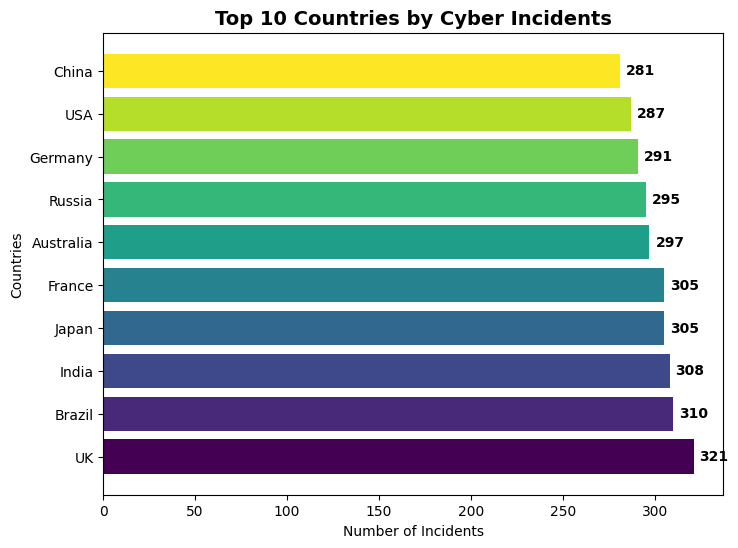

In [45]:
import seaborn as sns
plt.figure(figsize=(8, 6))
country_counts = df['Country'].value_counts().head(10)  # Top 10 countries
colors = plt.cm.viridis(np.linspace(0, 1, len(country_counts)))
bars = plt.barh(range(len(country_counts)), country_counts.values, color=colors)
plt.title('Top 10 Countries by Cyber Incidents', fontsize=14, fontweight='bold')
plt.xlabel('Number of Incidents')
plt.ylabel('Countries')
plt.yticks(range(len(country_counts)), country_counts.index)

# Add value labels
for i, (bar, value) in enumerate(zip(bars, country_counts.values)):
    plt.text(bar.get_width() + 0.01*max(country_counts.values), bar.get_y() + bar.get_height()/2, 
             str(value), ha='left', va='center', fontweight='bold')

plt.show()

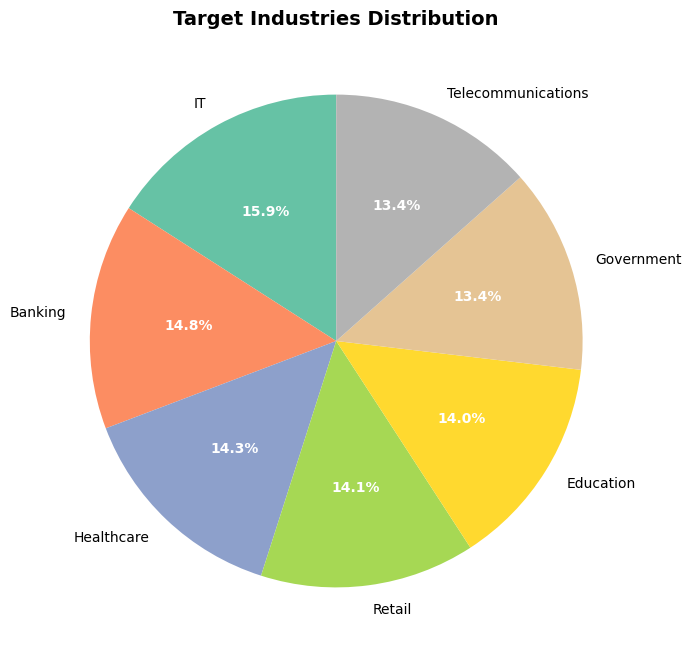

In [46]:
# Visualization 3: Target Industries Distribution (Pie Chart)
plt.figure(figsize=(10, 8))
industry_counts = df['Target Industry'].value_counts()
# Show top 8 industries, group rest as 'Others'
if len(industry_counts) > 8:
    top_industries = industry_counts.head(7)
    others_count = industry_counts.tail(len(industry_counts)-7).sum()
    plot_data = pd.concat([top_industries, pd.Series({'Others': others_count})])
else:
    plot_data = industry_counts

colors = plt.cm.Set2(np.linspace(0, 1, len(plot_data)))
wedges, texts, autotexts = plt.pie(plot_data.values, labels=plot_data.index, autopct='%1.1f%%',
                                   colors=colors, startangle=90)
plt.title('Target Industries Distribution', fontsize=14, fontweight='bold')

# Improve text readability
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0, 0.5, 'Hacker Group'),
  Text(0, 1.5, 'Insider'),
  Text(0, 2.5, 'Nation-state'),
  Text(0, 3.5, 'Unknown')])

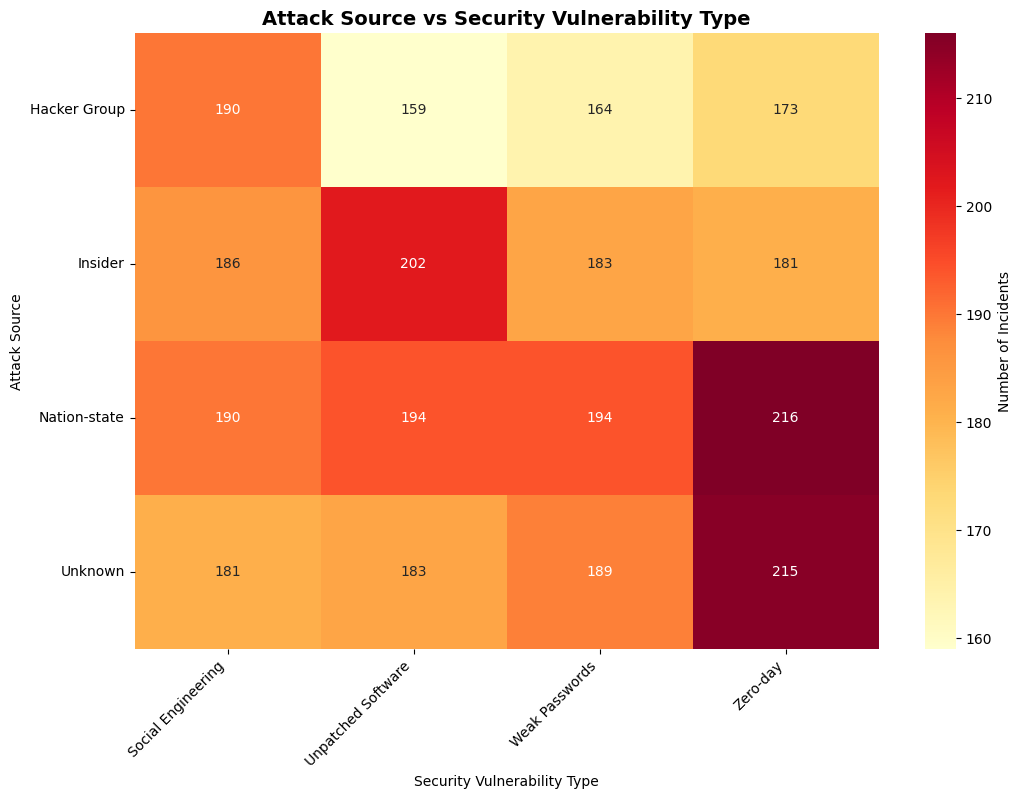

In [47]:
# Visualization 4: Attack Sources vs Security Vulnerabilities (Heatmap)
plt.figure(figsize=(12, 8))
# Create crosstab for heatmap
heatmap_data = pd.crosstab(df['Attack Source'], df['Security Vulnerability Type'])
sns.heatmap(heatmap_data, annot=True, cmap='YlOrRd', fmt='d', cbar_kws={'label': 'Number of Incidents'})
plt.title('Attack Source vs Security Vulnerability Type', fontsize=14, fontweight='bold')
plt.xlabel('Security Vulnerability Type')
plt.ylabel('Attack Source')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

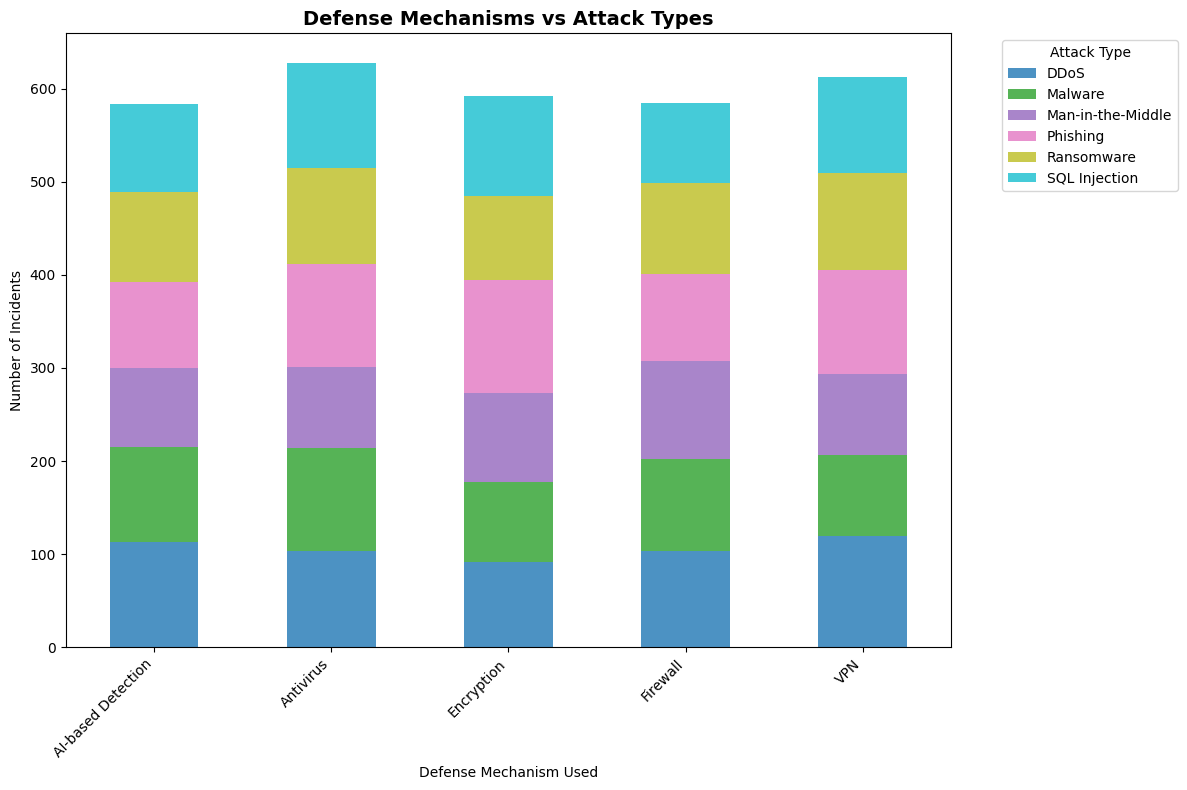

In [48]:
# Visualization 5: Defense Mechanisms Effectiveness (Stacked Bar Chart)
plt.figure(figsize=(12, 8)) 
# Create crosstab for stacked bar
defense_attack = pd.crosstab(df['Defense Mechanism Used'], df['Attack Type'])
defense_attack.plot(kind='bar', stacked=True, ax=plt.gca(), 
                   colormap='tab10', alpha=0.8)
plt.title('Defense Mechanisms vs Attack Types', fontsize=14, fontweight='bold')
plt.xlabel('Defense Mechanism Used')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Attack Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()